Experimenting with Ground Irradiance for tracking in Bifacialvf

This journal supports the process of designing a solar panel configuration to appropriately represent and Agripv setup with varying parameters.
The goal of this journal is to test and compare the irradiance values when changing certain parameters. Only one paramater is changed at a time. 


Details:
*	Location: lat = 32.25, -110.9 (Tuscon, Arizona)
*	Racking: single axis tracking panels
*	Panel size: 1m x 2m                                    
*	Analysis variations:
<ul> 
<li> a.	Hub Height: would like to look at multiple heights ([1, 1.5, 2, 2.5 meters]) </li> 


In [2]:
from pathlib import Path
import os
import bifacialvf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Experiment_2'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [12]:
# Variables

months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           
sazm = 180 #cycling through 3 different azimuths                 
albedo = 0.31  # Changed from 0.31 for test 6/9/22
x = 1
y = 2 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True
numpanels = 1
CW = y * numpanels


#Arrays for loops
tilts = [20,30]  
hub_heights = np.array([1,1.5,2,2.5]) 
GCRs = [0.28,0.33,0.4,0.6]
#Defaults
tilt_def = tilts[0]
hub_height_def = hub_heights[1]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def/CW
module_place = CW/GCR_def
 
# Tracking instructions
tracking=True
backtrack=True
limit_angle = 60





In [4]:
#Get weather file for Tuscon AZ
TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)
deltastyle = 'TMY3'

path = C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!


## Experiment for Hub height

In [14]:
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all hub heights
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch_def, hub_height=hub_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.5   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_1.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:39<00:00, 88.25it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_1.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:58<00:00, 74.14it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_2.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [02:26<00:00, 59.68it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.25   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_2.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [04:07<00:00, 35.35it/s]

Finished


## Compare Results for Hub  Heights

C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


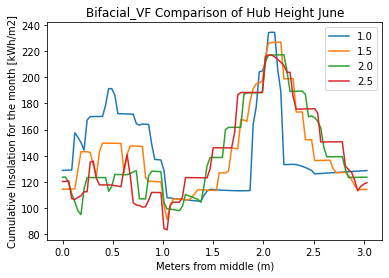

In [125]:
plt.figure(1)
for hh in range (0, len(hub_heights)):
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    do = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    Jun = df['Jun']
    #Split the column at the midpoint and bring the front data to the back. This is done to look at data between middle of rows
    # instead of from front edge to front edge
    splitfront = Jun.iloc[:33]
    splitback = Jun.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    graph = plt.plot(xaxis, full/1000, label=chreg)
    plt.title('Bifacial_VF Comparison of Hub Height June')
    plt.xlabel('Meters from middle (m)')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend()

  

C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1438986964.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


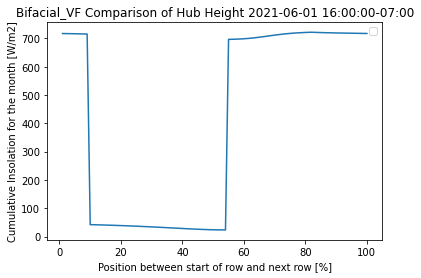

In [114]:
# Example of how we split the graph above for one singular time
times = ['2021-06-01 09:00:00-07:00','2021-06-01 15:00:00-07:00', '2021-06-01 16:00:00-07:00']
#Get tile from result file
tilt = 0
CW = 2
writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_1.5.csv')
#Load the results from the resultfile
from bifacialvf import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)
#Work with data in resultfile
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
date = times[2]
gg = groundIrrads.loc[date]
#Calculate midpoint. Use this to figure out where to split table. We'll split at row 33
mid = 0.5*CW*np.cos(tilt)
#will make two seperate tables from the split and then append front split to back split
splitfront = gg.iloc[:33]
splitback = gg.iloc[33:]
full = splitback.append(splitfront)
#create x axis
xstep = pitch_def/100
xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
plt.figure(1)
graph = plt.plot(x_axis, full)
plt.title('Bifacial_VF Comparison of Hub Height '+date)
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [W/m2]')
plt.legend()

## Change Graph Data

C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


<function matplotlib.pyplot.show(close=None, block=None)>

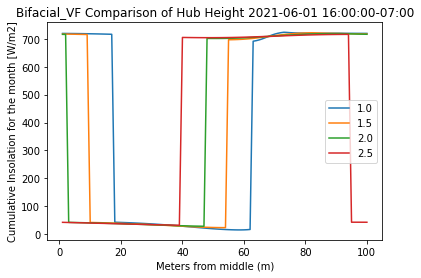

In [115]:
# Changing graph data for a singular time for all the hub heights
times = ['2021-06-01 09:00:00-07:00','2021-06-01 15:00:00-07:00', '2021-06-01 16:00:00-07:00']
#Get tile from result file
tilt = 0
CW = 2
plt.figure(1)
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    date = times[2]
    gg = groundIrrads.loc[date]
    #Calculate midpoint. Use this to figure out where to split table. We'll split at row 33
    mid = 0.5*CW*np.cos(tilt) #This midpoint is at 1m because the tilt is 0
    #will make two seperate tables from the split and then append front split to back split
    splitfront = gg.iloc[:33]
    splitback = gg.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    graph = plt.plot(x_axis, full, label=chreg)
    plt.title('Bifacial_VF Comparison of Hub Height '+date)
    plt.xlabel('Meters from middle (m)')
    plt.ylabel('Cumulative Insolation for the month [W/m2]')
plt.legend()
plt.show
    

## Experiment for GCR

In [17]:
for gc in range (0, len(GCRs)):
    #Build scene and run raytracing for all GCRs
    GCR = GCRs[gc]
    pitch = CW/GCR/CW
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, hub_height=hub_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

  

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.571428571428571   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.28.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.571428571428571
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:42<00:00, 85.87it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.33.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:42<00:00, 85.13it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.5   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.4.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.5
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.81it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  1.6666666666666667   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.6.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  0.6666666666666667
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:52<00:00, 77.94it/s]

Finished


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1875072680.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1875072680.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1875072680.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1875072680.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


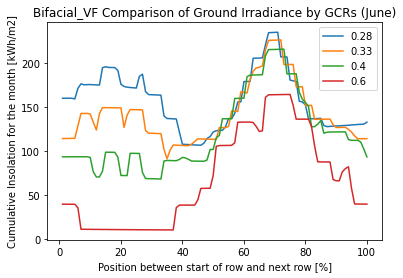

In [126]:
#Perform the same graph changes as hub height for GCR
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    
    Jun = df['Jun']
    #Split the column at the midpoint and bring the front data to the back. This is done to look at data between middle of rows
    # instead of from front edge to front edge
    splitfront = Jun.iloc[:33]
    splitback = Jun.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, full/1000, label=GCR)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/pitch)*100 #Percentage between rows where the module ends)
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF Comparison of Ground Irradiance by GCRs (June)')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Changing Transmission Factor

In [10]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)



2 2 0.0
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.63it/s]


Finished
2.1 2 0.04761904761904767
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.04761904761904767.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.03030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:53<00:00, 77.40it/s]


Finished
2.2 2 0.09090909090909094
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.09090909090909094.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:48<00:00, 80.89it/s]


Finished
2.3 2 0.13043478260869557
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.13043478260869557.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:46<00:00, 82.29it/s]


Finished
2.5 2 0.19999999999999996
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.19999999999999996.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:51<00:00, 78.55it/s]


Finished
3 2 0.33333333333333337
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.33333333333333337.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.03030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [04:13<00:00, 34.61it/s]

Finished


2 2 0.0


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


2.1 2 0.04761904761904767


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


2.2 2 0.09090909090909094


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


2.3 2 0.13043478260869557


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


2.5 2 0.19999999999999996


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


3 2 0.33333333333333337


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1619468081.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


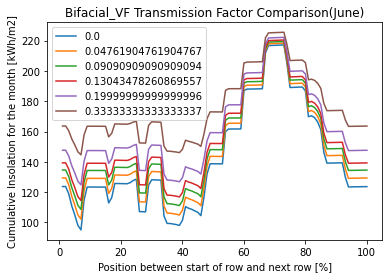

In [127]:
#Perform the same graph changes as hub height for TransFactor
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')

    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    
    Jun = df['Jun']
    #Split the column at the midpoint and bring the front data to the back. This is done to look at data between middle of rows
    # instead of from front edge to front edge
    splitfront = Jun.iloc[:33]
    splitback = Jun.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    plt.figure(1)
    VF = plt.plot(x_axis, full/1000, label=transFactor)
    plt.title('Bifacial_VF Transmission Factor Comparison(June)')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()